# <center> Discrete Distribution </center>


> A discrete probability distribution is the probability distribution of a random variable that can take on only a countable number of values. In the case where the range of values is countably infinite, these values have to decline to zero fast enough for the probabilities to add up to 1. Well-known discrete probability distributions used in statistical modeling include the Poisson distribution, the Bernoulli distribution, the binomial distribution, the geometric distribution, and the negative binomial distribution. Additionally, the discrete uniform distribution is commonly used in computer programs that make equal-probability random selections between a number of choices. \- [Wikipedia](https://en.wikipedia.org/wiki/Probability_distribution)

### <center> Import required packages </center>

In [1]:
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import matplotlib, numpy and seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### <center> Change some settings </center>

In [2]:
#for inline plots in Jupyter
%matplotlib inline
#settings for seaborn plotting style
sns.set(color_codes = True)
#settings for seaborn plot size
sns.set(rc = {'figure.figsize':(5, 5)})

## <center> Uniform Distribution </center>


> In probability theory and statistics, the discrete uniform distribution is a symmetric probability distribution wherein a finite number of values are equally likely to be observed; every one of n values has equal probability. Another way of saying "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen" \- [Wikipedia](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)

For a uniform distribution over the numbers a to b (both included), the Probability Mass function f(X = x) is
$$f(X = x) = 
  \begin {cases}
  \frac{1}{n}, &\quad\text{if x } \in [a, b]\\
  \text{0}, &\quad\text{otherwise.}
  \end {cases}
  $$

where,
$$
n = b - a + 1 \space 
\text{and}
\space
b \gneq a
$$

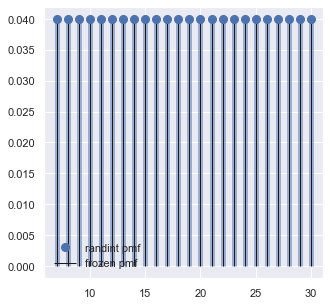

In [3]:
from scipy.stats import randint
fig, ax = plt.subplots(1, 1)
#Calculate a few first moments
low, high = 7, 32
mean, vart, skew, kurt = randint.stats(low, high, moments = 'mvsk')
#Display the pmf
x = np.arange(randint.ppf(0.01, low, high), randint.ppf(0.99, low, high))
ax.plot(x, randint.pmf(x, low, high), 'bo', ms = 8, label = "randint pmf")
ax.vlines(x, 0, randint.pmf(x, low, high), colors = "b", lw = 5, alpha = 0.5)

#Alternatively, the distribution object can be called (as a function) 
#to fix the shape and location. This returns a "frozen" RV object holding
#The given parameters fixed

#Freeze the distribution and display the frozen pmf

rv = randint(low, high)
ax.vlines(x, 0, rv.pmf(x), colors = "k", linestyles = "-", lw = 1, label = "frozen pmf")
ax.legend(loc = "best", frameon = False)
plt.show()

#Check accuracy of cdf and ppf

prob = randint.cdf(x, low, high)
np.allclose(x, randint.ppf(prob, low, high))

#Generate random numbers
r = randint.rvs(low, high, size = 1000)

## <center> Bernoulli  Distribution </center>


> In probability theory and statistics, the Bernoulli distribution, named after Swiss mathematician Jacob Bernoulli, is the discrete probability distribution of a random variable which takes the value 1 with probability ***p*** and the value 0 with probability ***q*** = 1 - ***p***. Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question. \- [Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_distribution)


The probability mass function ***f*** of this distribution, over possible outcomes X = x, is
$$
f(X = x) = 
\begin {cases}
  q = 1 - p, &\quad\text{if x = 0}\\
  p, &\quad\text{if x = 1.}
  \end {cases}
$$

This can also be represented as
$$f(X = x) = p^{x}(1 - p)^{1 - x} \quad \text{for x} \in [0, 1]$$

In [4]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size = 10000, p = 0.6)
# ax = sns.distplot(data_bern, kde = False, color = "khaki", hist_kws = {'linewidth':15, 'alpha' : 1})
ax = sns.displot(data_bern, kde = False, color = "khaki", alpha = 1, linewidth = 10)
ax.set(xlabel = "Bernoulli Distribution", ylabel = "Frequency")

## <center> Binomial Distribution </center>


> In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment, and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution. \- [Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)


The probability mass function for a binomial distribution with n independent experiments, p being the probability of success and q = 1 - p being the probability of failure is
$$
f(X = x) = \binom {n}{x} \cdot p^{x} q^{n - x}
$$

In [5]:
from scipy.stats import binom
data_binom = binom.rvs(n = 10, p = 0.8, size = 10000)
# ax = sns.distplot(data_binom, kde = False, color = "green", hist_kws = {'linewidth':15, 'alpha' : 1})
ax = sns.displot(data_binom, kde = False, color = "green", linewidth = 15, alpha = 1)
ax.set(xlabel = "Binomial Distribution", ylabel = "Frequency")

## <center> Poisson Distribution </center>


> In probability theory and statistics, the Poisson distribution, named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. \- [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)


The probability mass function for Poisson Distribution is:
$$
f(X = x) = \frac{\lambda^{x} e^{-\lambda}}{x!}
$$

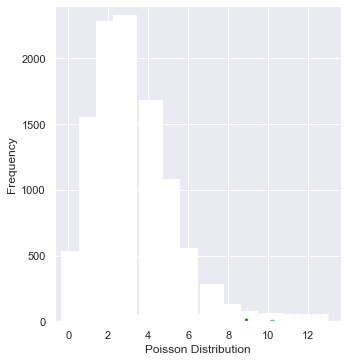

In [6]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu = 3, size = 10000)
# ax = sns.distplot(data_poisson, bins = 30, kde = False, color = "green", hist_kws = {'linewidth':15, 'alpha' : 1})
ax = sns.displot(data_poisson, bins = 30, kde = False, color = "green", linewidth= 15, alpha = 1)
ax.set(xlabel = "Poisson Distribution", ylabel = "Frequency")